In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

not_locked = ['time', 'pelvis_rotation', 'lumbar_extension', 'lumbar_bending',
       'lumbar_rotation', 'arm_flex_r', 'arm_add_r', 'arm_rot_r',
       'elbow_flex_r', 'arm_flex_l', 'arm_add_l', 'arm_rot_l', 'elbow_flex_l']

In [2]:
rpi_filter = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-03_1639\ik_tiny_file.mot",sep='\t',skiprows=6)
com_filter = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-03_1639\ik_new_tiny_file.mot",sep='\t',skiprows=6)

In [3]:
rpi_filter.head()

,time,pelvis_tilt,pelvis_list,pelvis_rotation,pelvis_tx,pelvis_ty,pelvis_tz,hip_flexion_r,hip_adduction_r,hip_rotation_r,...,pro_sup_r,wrist_flex_r,wrist_dev_r,arm_flex_l,arm_add_l,arm_rot_l,elbow_flex_l,pro_sup_l,wrist_flex_l,wrist_dev_l
0,0.00,7.249202e-28,8.454772e-28,18.763143,-9.705385e-30,0.94,-8.023209e-30,5.713783e-28,1.102075e-19,-4.240294e-19,...,9.177060e-15,2.466703e-20,-1.006246e-20,-0.361166,-0.081381,-0.021108,0.597520,9.177060e-15,3.238882e-20,6.515
1,0.02,7.039890e-13,-8.058041e-13,18.728504,9.619178e-43,0.94,7.747331e-43,2.735850e-32,-1.064156e-32,4.075461e-32,...,2.507530e-15,1.867859e-29,1.212283e-30,-0.425836,-0.078031,-0.044317,0.507463,2.507530e-15,-1.779560e-28,6.515
2,0.04,0.000000e+00,0.000000e+00,18.691006,0.000000e+00,0.94,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-0.502983,-0.170024,0.021216,0.457152,0.000000e+00,0.000000e+00,6.515
3,0.06,0.000000e+00,0.000000e+00,18.676519,0.000000e+00,0.94,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.470126e-47,0.000000e+00,0.000000e+00,-0.590383,-0.222509,0.021897,0.418303,1.470126e-47,0.000000e+00,6.515
4,0.08,0.000000e+00,0.000000e+00,18.668212,0.000000e+00,0.94,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.568135e-46,0.000000e+00,0.000000e+00,-0.704271,-0.357036,0.076082,0.382934,2.352202e-46,0.000000e+00,6.515


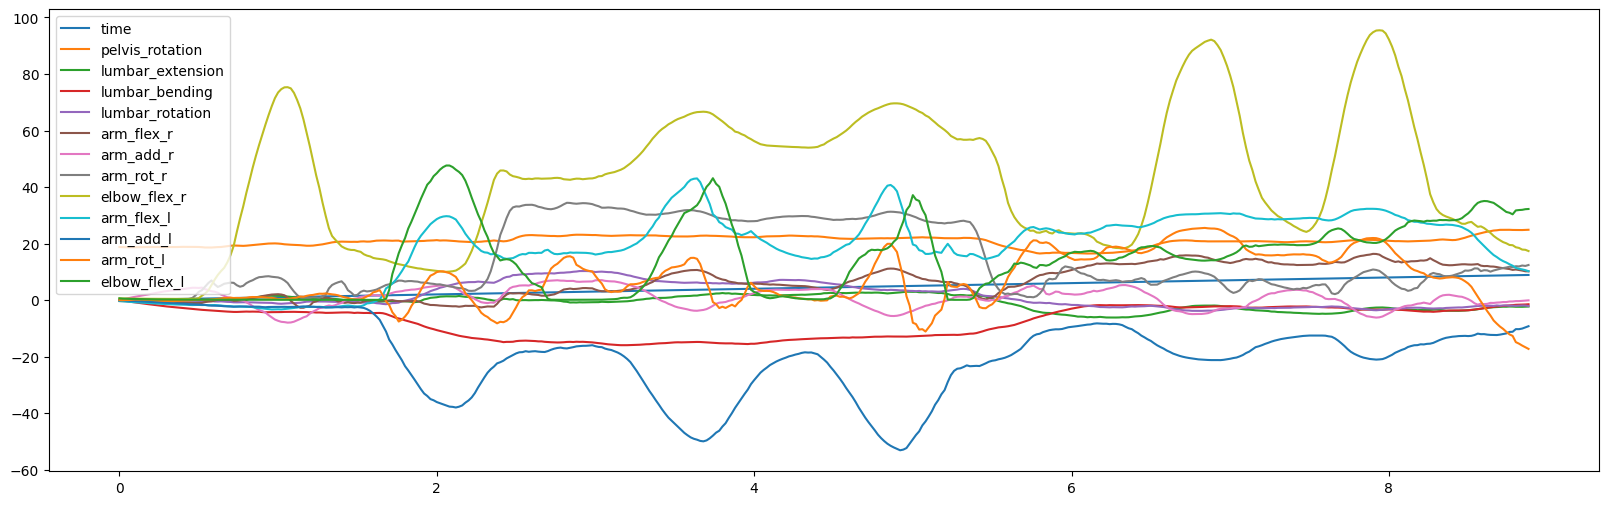

In [8]:
x = rpi_filter["time"]

plt.figure(figsize=(20,6))
for col in not_locked:
    y = rpi_filter[col]
    plt.plot(x,y,label = col)


plt.legend()
plt.show()

In [12]:
ranges = []
for col in not_locked:
    ranges.append((col,rpi_filter[col].max() - rpi_filter[col].min()))

ranges.sort(key = lambda x: x[1],reverse = True)
print(ranges)

[('elbow_flex_r', 95.0779220864014), ('arm_add_l', 53.08481910778082), ('elbow_flex_l', 47.56612676923521), ('arm_flex_l', 46.38003023309011), ('arm_rot_l', 42.81531626190565), ('arm_rot_r', 34.489003956989), ('arm_flex_r', 19.080603184658237), ('lumbar_bending', 15.9536839797691), ('arm_add_r', 15.031194513739871), ('lumbar_rotation', 14.113712709907437), ('lumbar_extension', 9.160689696978675), ('time', 8.88), ('pelvis_rotation', 8.411649805807038)]


Compare the first 4 items

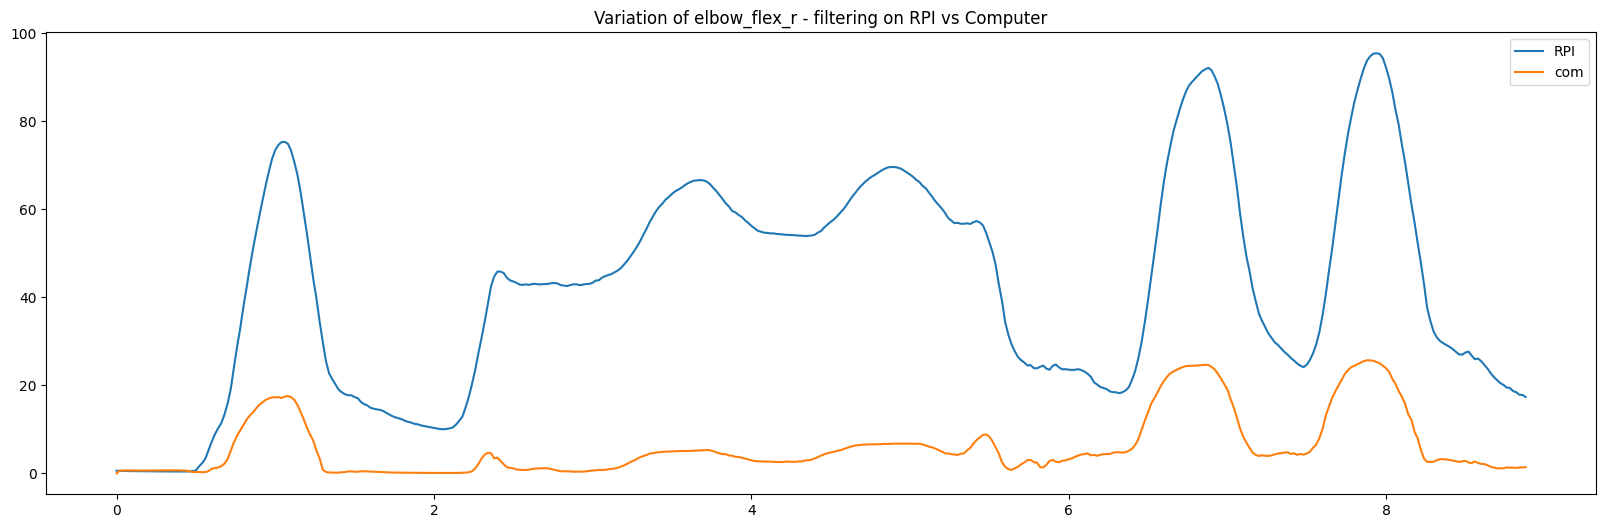

In [13]:
x = rpi_filter["time"]

plt.figure(figsize=(20,6))

y = rpi_filter['elbow_flex_r']
plt.plot(x,y,label = 'RPI')

y = com_filter['elbow_flex_r']
plt.plot(x,y,label = 'com')

plt.title("Variation of elbow_flex_r - filtering on RPI vs Computer")


plt.legend()
plt.show()

In [16]:
rpi_quat = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-03_1639\tiny_file.sto",sep='\t',skiprows=5)
com_quat = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-03_1639\new_tiny_file.sto",sep='\t',skiprows=5)

In [18]:
#Strange that the processing of data shifts all the columns

def shift_cols(df):
    old_columns = df.columns
    column_names = ['time', 'pelvis_imu', 'torso_imu', 'humerus_l_imu','ulna_l_imu', 'humerus_r_imu', 'ulna_r_imu']
    col_names = {}
    for i, name in enumerate(column_names):
        col_names[old_columns[i]] = name

    filtered_df = df.drop('ulna_r_imu',axis = 1)
    filtered_df = filtered_df.rename(columns = col_names)

    return filtered_df

rpi_quat_filtered = shift_cols(rpi_quat)
com_quat_filtered = shift_cols(com_quat)

In [19]:
rpi_quat_filtered.head()

,time,pelvis_imu,torso_imu,humerus_l_imu,ulna_l_imu,humerus_r_imu,ulna_r_imu
0,0.00,"0.695934991379335,0.5087218998073874,-0.332333...","0.6751845045832906,0.7299278740733237,-0.05016...","0.6306342177837828,0.7688516581030858,0.037950...","0.5762578159538719,0.6547680135070741,0.319126...","0.7593301884128841,0.6243268809741978,-0.13996...","0.7062750405285112,0.5555943148599561,0.269998..."
1,0.02,"0.6968808589280426,0.5089619377940037,-0.33111...","0.676289277969983,0.7288691815214482,-0.050450...","0.6309910607411341,0.7685501256543242,0.038004...","0.5772099669829833,0.6541876817158219,0.320563...","0.7592016940793046,0.6243262047600776,-0.14018...","0.7057308098903088,0.5568555558904694,0.270099..."
2,0.04,"0.69775069132277,0.5092029634827058,-0.3299673...","0.6774063433255472,0.7277797802260845,-0.05078...","0.631294582320087,0.7684433640909343,0.0375237...","0.5784189607788492,0.6537265705100922,0.321544...","0.7592116072311714,0.6243540670962968,-0.13994...","0.7051491183517935,0.5579922913153198,0.270149..."
3,0.06,"0.6985135658237979,0.5094216118170828,-0.32879...","0.678442817587817,0.7267658614402516,-0.051113...","0.6315899091086938,0.7682752954451285,0.037437...","0.5791529773409385,0.6531452145867724,0.322788...","0.7591414637645828,0.6243153105256014,-0.14014...","0.7043627238466835,0.5591574598008278,0.270600..."
4,0.08,"0.6992102617390333,0.5095946112981242,-0.32774...","0.6794115813931487,0.725750352072838,-0.051468...","0.6317506545588357,0.7681532086406164,0.037670...","0.5802611384724286,0.6529695282854694,0.323361...","0.7590845070695145,0.6243330811386082,-0.14021...","0.7037934914454834,0.5601155036104953,0.270682..."


In [20]:
com_quat_filtered.head()

,time,pelvis_imu,torso_imu,humerus_l_imu,ulna_l_imu,humerus_r_imu,ulna_r_imu
0,0.00,"0.6956523206325234,0.5088940330848462,-0.33246...","0.6750341194654884,0.7300568088391243,-0.05006...","0.6306189063382801,0.7688491474613944,0.037872...","0.5761395872126267,0.6547761969868974,0.318859...","0.7595455323591608,0.6240509637157159,-0.14005...","0.7065070695370597,0.5553875920754917,0.269671..."
1,0.02,"0.6953735527176628,0.5090762078072278,-0.33259...","0.6749022102409845,0.7301661493450053,-0.04999...","0.631012701187047,0.7685091241235615,0.0376915...","0.5762708782459683,0.6546685007196295,0.318447...","0.7595794866966268,0.6240206363291526,-0.14020...","0.7066503919819338,0.5552388917447644,0.269444..."
2,0.04,"0.6951568235758285,0.5092089821103013,-0.33279...","0.6747772612422338,0.7302722871491057,-0.04990...","0.6311952871382717,0.7683256650076817,0.037602...","0.5761391074600505,0.6547213561470615,0.318305...","0.7597680452500396,0.6237929885481113,-0.14028...","0.7067625439869231,0.5552728955783129,0.269146..."
3,0.06,"0.6949573877877326,0.5093257907722292,-0.33299...","0.6747717312500349,0.7302845270753068,-0.04988...","0.6311811351538632,0.7683054191844165,0.037568...","0.5764000201917755,0.6544877894520469,0.317889...","0.7598840251521627,0.6236606957758584,-0.14039...","0.7068148692732614,0.5551779097663025,0.269007..."
4,0.08,"0.6948552027441137,0.5093735069092248,-0.33324...","0.6746156267098408,0.7304225009098524,-0.04990...","0.6315575135846864,0.7679931459325018,0.037301...","0.5766109492679478,0.6543191348626607,0.317572...","0.759809970236776,0.6237599365209451,-0.140584...","0.706848767068546,0.5551894558904685,0.2688537..."


In [22]:
def split_df(df):
    new_df = df['time']
    for col in df.columns[1:]:
        column = df[col]
        dict = {}
        for i in range(4):
            dict[i] = col + " " + str(i)
        split_up = column.str.split(",", expand = True).rename(columns=dict)
        float_split=split_up.astype('float')
        new_df = pd.concat([new_df, float_split], axis=1)
    
    return new_df


In [24]:
com_numer = split_df(com_quat_filtered)
rpi_numer = split_df(rpi_quat_filtered)

In [29]:
com_numer.head()

,time,pelvis_imu 0,pelvis_imu 1,pelvis_imu 2,pelvis_imu 3,torso_imu 0,torso_imu 1,torso_imu 2,torso_imu 3,humerus_l_imu 0,...,ulna_l_imu 2,ulna_l_imu 3,humerus_r_imu 0,humerus_r_imu 1,humerus_r_imu 2,humerus_r_imu 3,ulna_r_imu 0,ulna_r_imu 1,ulna_r_imu 2,ulna_r_imu 3
0,0.00,0.695652,0.508894,-0.332468,0.382831,0.675034,0.730057,-0.050063,0.094020,0.630619,...,0.318859,0.371026,0.759546,0.624051,-0.140058,-0.118469,0.706507,0.555388,0.269672,0.345933
1,0.02,0.695374,0.509076,-0.332598,0.382982,0.674902,0.730166,-0.049993,0.094155,0.631013,...,0.318448,0.371365,0.759579,0.624021,-0.140203,-0.118239,0.706650,0.555239,0.269444,0.346056
2,0.04,0.695157,0.509209,-0.332800,0.383024,0.674777,0.730272,-0.049906,0.094273,0.631195,...,0.318306,0.371598,0.759768,0.623793,-0.140288,-0.118127,0.706763,0.555273,0.269147,0.346004
3,0.06,0.694957,0.509326,-0.332992,0.383064,0.674772,0.730285,-0.049884,0.094230,0.631181,...,0.317890,0.371961,0.759884,0.623661,-0.140398,-0.117949,0.706815,0.555178,0.269008,0.346158
4,0.08,0.694855,0.509374,-0.333244,0.382966,0.674616,0.730423,-0.049903,0.094268,0.631558,...,0.317572,0.372202,0.759810,0.623760,-0.140585,-0.117679,0.706849,0.555189,0.268854,0.346189


In [30]:
rpi_numer.head()

,time,pelvis_imu 0,pelvis_imu 1,pelvis_imu 2,pelvis_imu 3,torso_imu 0,torso_imu 1,torso_imu 2,torso_imu 3,humerus_l_imu 0,...,ulna_l_imu 2,ulna_l_imu 3,humerus_r_imu 0,humerus_r_imu 1,humerus_r_imu 2,humerus_r_imu 3,ulna_r_imu 0,ulna_r_imu 1,ulna_r_imu 2,ulna_r_imu 3
0,0.00,0.695935,0.508722,-0.332334,0.382663,0.675185,0.729928,-0.050165,0.093886,0.630634,...,0.319127,0.370626,0.759330,0.624327,-0.139961,-0.118509,0.706275,0.555594,0.269999,0.345820
1,0.02,0.696881,0.508962,-0.331113,0.381679,0.676289,0.728869,-0.050450,0.094007,0.630991,...,0.320563,0.368926,0.759202,0.624326,-0.140189,-0.119065,0.705731,0.556856,0.270100,0.344822
2,0.04,0.697751,0.509203,-0.329967,0.380760,0.677406,0.727780,-0.050789,0.094221,0.631295,...,0.321545,0.366990,0.759212,0.624354,-0.139946,-0.119142,0.705149,0.557992,0.270149,0.344135
3,0.06,0.698514,0.509422,-0.328798,0.380079,0.678443,0.726766,-0.051113,0.094415,0.631590,...,0.322789,0.365774,0.759141,0.624315,-0.140144,-0.119559,0.704363,0.559157,0.270601,0.343499
4,0.08,0.699210,0.509595,-0.327745,0.379475,0.679412,0.725750,-0.051469,0.095065,0.631751,...,0.323361,0.363820,0.759085,0.624333,-0.140215,-0.119745,0.703793,0.560116,0.270682,0.343040


In [34]:
sorted_range = com_numer.max() - com_numer.min()
sorted_range.sort_values(ascending=False)[:10]

time               8.880000
ulna_r_imu 3       0.326083
ulna_l_imu 2       0.284991
ulna_l_imu 3       0.255299
ulna_r_imu 0       0.252869
ulna_r_imu 1       0.217835
ulna_l_imu 0       0.210493
ulna_l_imu 1       0.198311
ulna_r_imu 2       0.142370
humerus_r_imu 1    0.128775
dtype: float64

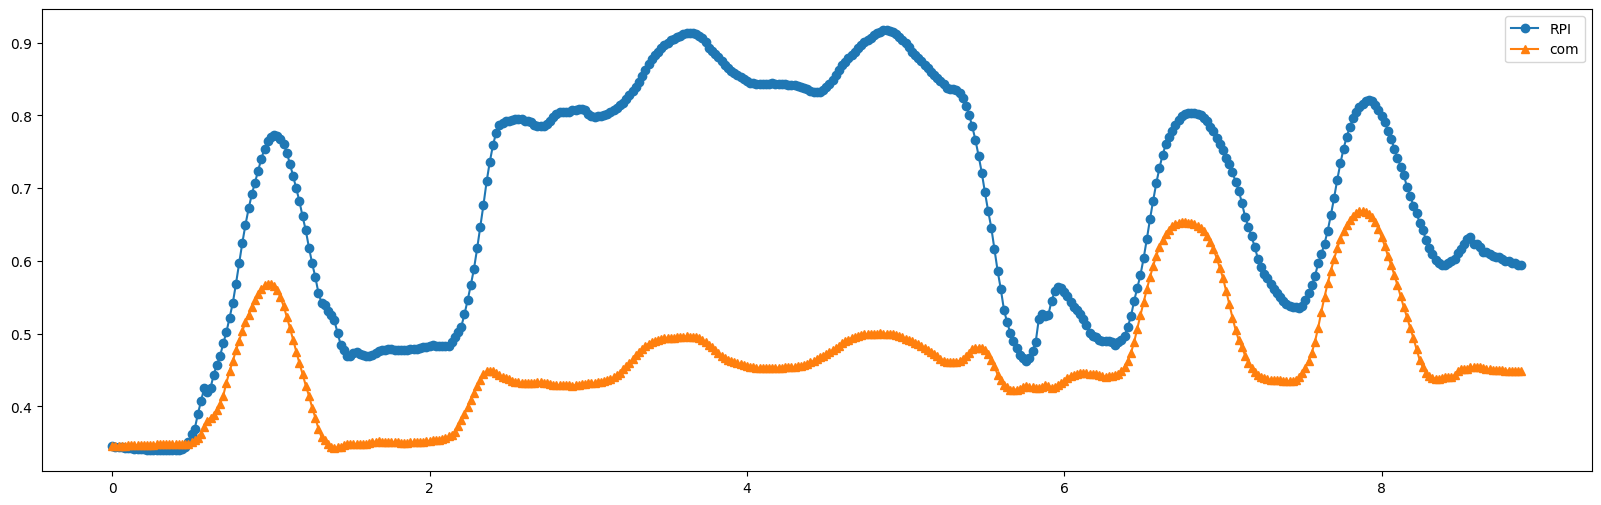

In [43]:

X = com_numer['time']
y_values = ['ulna_r_imu 3']#,'ulna_r_imu 2','ulna_r_imu 1','ulna_r_imu 0']
plt.figure(figsize=(20,6))

for value in y_values:
    plt.plot(x,rpi_numer[value],label = 'RPI',marker= "o")
    plt.plot(x,com_numer[value],label = 'com',marker= "^")


plt.legend()
plt.show()
